# Compute volage changes by 1 mu molar concentrations change

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [118]:


c_m = 0.01 # F/m^2     membrane capactiance               

z = 2.
                                                                          

pi = 3.1415     # PI                                                           

N_A = 6.022e23   # Avogrado's constant                                                                               

e = 1.602e-19   # elementary charge                                                          

delta_c_Cl = 1.e-3 # = 1 {\mu}molar change      https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3312680/     & Sabatini et al. 2002; Higley and Sabatini 2008                                                           

 

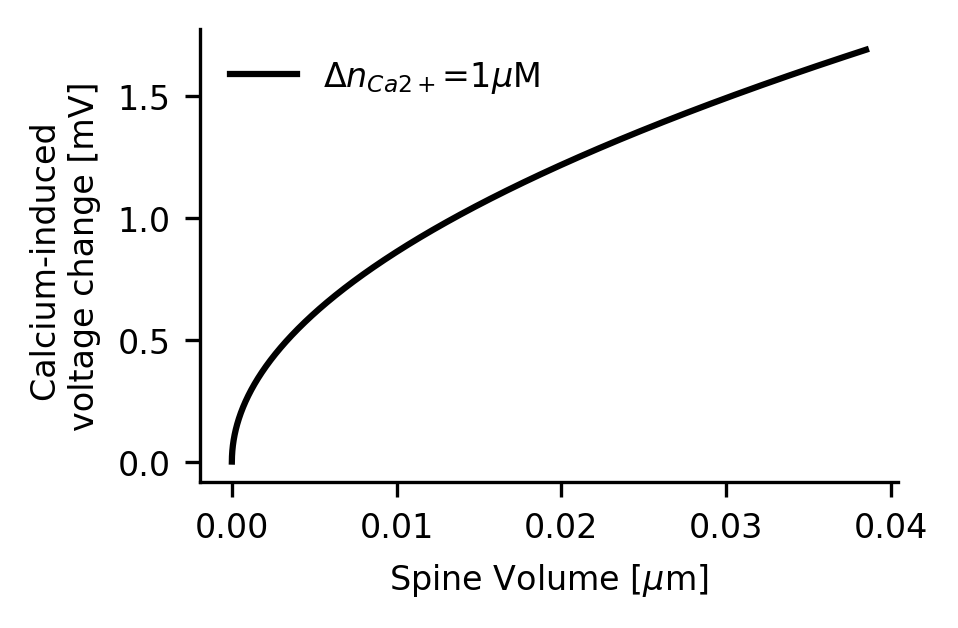

In [86]:
# Cylinder 
d = np.linspace(0,175,1000)[1:]*1.e-9 # radius 
l = .4e-6         # height of cylinder     
s = l * 2. * pi * d    # surface   area excluding top base and bottom base  
C = c_m * s      # Capacitance total   
v = l * pi * d**2       # Volume  
Q = delta_c_Cl * z*e *N_A * v  # total charge of calcium ions
vm = Q/C # voltage

to_mu = 1.e18
to_mv = 1.e3

fig = plt.figure(dpi=300, figsize=(3,2))
ax = fig.add_subplot(111)
ax.plot(v*to_mu,vm*to_mv, 'k-', label='$\Delta n_{Ca2+}$=1$\mu$M')
#ax.plot(r,vm*to_mv)


ax.set_xlabel('Spine Volume [$\mu$m]', fontsize=8)
ax.set_ylabel('Calcium-induced \nvoltage change [mV]', fontsize=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(fontsize=8, frameon=False)
ax.tick_params(labelsize=8)

plt.show()

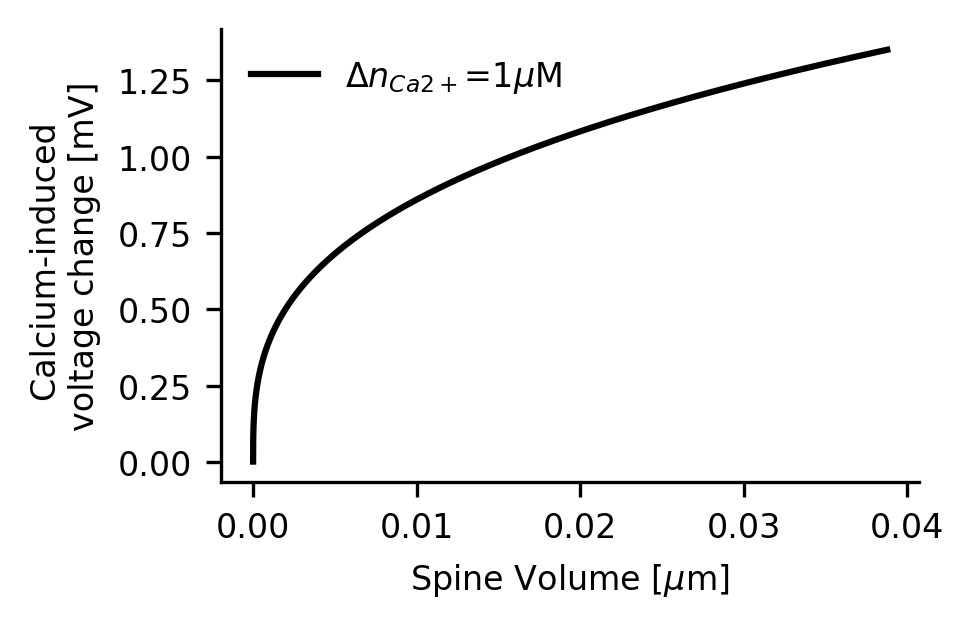

In [80]:
# spherical geometry
r = np.linspace(0,210,1000)*1.e-9  # radius 
r = r[1:]
s = 4. * pi * r*r    # surface   area excluding top base and bottom base  
C = c_m * s      # Capacitance total   
v = 4./3. * pi * r**3    # Volume  
Q = delta_c_Cl *z* e *N_A * v  # total charge of calcium ions
vm = Q/C # voltage

to_mu = 1.e18
to_mv = 1.e3

fig = plt.figure(dpi=300, figsize=(3,2))
ax = fig.add_subplot(111)
ax.plot(v*to_mu,vm*to_mv, 'k-', label='$\Delta n_{Ca2+}$=1$\mu$M')
#ax.plot(r,vm*to_mv)


ax.set_xlabel('Spine Volume [$\mu$m]', fontsize=8)
ax.set_ylabel('Calcium-induced \nvoltage change [mV]', fontsize=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(fontsize=8, frameon=False)
ax.tick_params(labelsize=8)

plt.show()

### How many calcium ions are in the spine head
radius = [0.1,0.2,0.3,05]
concentration = 1.e-3

In [78]:
import numpy as np
from numpy.linalg import norm
for k in range(15):
    eps = np.power(10.,-k)
    v1 = (1., 0.)
    v2 = (np.cos(np.pi-eps),np.sin(np.pi-eps))
    alpha = np.arccos(np.dot(v1,v2)/norm(v1)/norm(v2))
    print(eps, ( np.pi-eps -alpha)/eps)


1.0 0.0
0.1 -8.881784197001252e-15
0.01 1.3322676295501878e-13
0.001 -7.993605777301127e-12
0.0001 -2.62456723021387e-09
1e-05 4.134470543704082e-08
1e-06 -6.657430162704259e-05
1e-07 -0.00039972025689394286
1e-08 -0.999999993922529
1e-09 -1.000000082740371
1e-10 -1.000000082740371
1e-11 -1.000000082740371
1e-12 -1.000088900582341
1e-13 -0.9992007221626409
1e-14 -1.021405182655144


In [22]:
# upper bound for increase of sodium concentration
import numpy as np
volume = (250.e-9)**2*np.pi*464.e-9 # m^3
c_na = 10  ##mmol= Mol pro m^3
N_a = 6.022e23
n_na = c_na*N_a*volume

i = 25.e-12
e = 1.6022e-19
t = 0.01 # sec , 10 ms
n_syn = i / e * t

n_syn, n_na, (n_syn+n_na) / n_na,volume*1.e18

(1560354.5125452504,
 548641.4578376143,
 3.8440331846141316,
 0.09110618695410401)

In [21]:
x=np.linspace(0,1.3e-6,15)
x[1]+x[-1]

1.392857142857143e-06

During an EPSP with a synaptic current of 23 pA \citep{cornejo2022voltage} that lasts for 12 ms \citep{acker2016epsps}, the estimated number of sodium ions entering the spine is roughly $14.0 \cdot 10^5$ \footnote{$N = i_{syn} \cdot e \cdot \Delta t$, where N is the number of ions, $i_syn$ the average current strength, $e$ the elementary charge and $\Delta t$ the duration.}. 

In [7]:
N = 23.e-12 / e * 0.012
N

1722846.4419475659

Due to the small volume of spines, their intracellular ion concentrations can easily change \citep{lagache2019electrodiffusion}. A typical pyramidal cell spine head, with a volume of $0.02~ \mu m^3$ \citep{eberhardt2022uniform}, is estimated to contain approximately $1.2\cdot 10^5$ sodium ions at a concentration of 10 mmol.

In [8]:
0.02e-18 * N_A * 10

120440.0

# Charge conservation
Revision 1 -
REVIEWER 2 -
Comment 12): I’m a bit unsure how the boundary conditions ensure charge conservation. Could the
author please explain and preferably run a simulation showing that charge is
conserved?

In [1]:
import sys
sys.path.append('./../')
import spineSimulator
from spineSimulator import plot

import copy
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import numpy as np

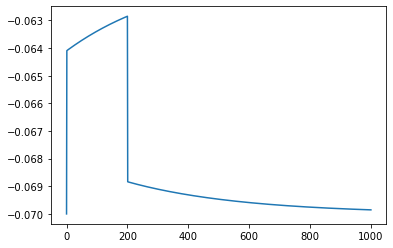

In [87]:
file_id = 'experiment_205'
(x,
a,
t,
phi,
c_Na,
c_K,
c_Cl,
param_set,
params,
dx,
dt,
r_Na,
R_Na,
g_Na_ij,
r_K,
R_K,
g_K_ij,
r_Cl,
R_Cl,
g_Cl_ij,
r_e,
R_e,
g_ij,
i_c_Na,
i_c_K,
i_c_Cl,
i_e_Na,
i_e_K,
i_e_Cl,
i_e,
i_c,
i_total,
) = plot.get_results_summary(file_id)

plt.plot(phi[:,1])

The changes in sodium concentrations are reasonable as the number of sodium ions entering the spine head within 10 ms at 25 pA is 1.56*10^6 while the number of sodium ions at rest in the spine head at 10 mmol is 0.55*10^6. This provides an upper bound for the increase of the sodium concentration by 38.4 mmol. To keep the spine head electroneutral one kation has to leave the spine head through the spine neck for ever sodium ion that enters through the synapse.  At rest there are 150 mmol potassium and 10 mmol sodium in the spine head. So mostly postassium will leave the spine head. In addition decay time constants for sodium were estimated in the manuscript to 19 ms. Altogether an increase of sodium concentration to 28 mmol is reasonable and indicating that the numerical solution is accurate.

array([0.61775728, 0.62081851, 0.62341578, ..., 0.66588896, 0.66576418,
       0.66563972])

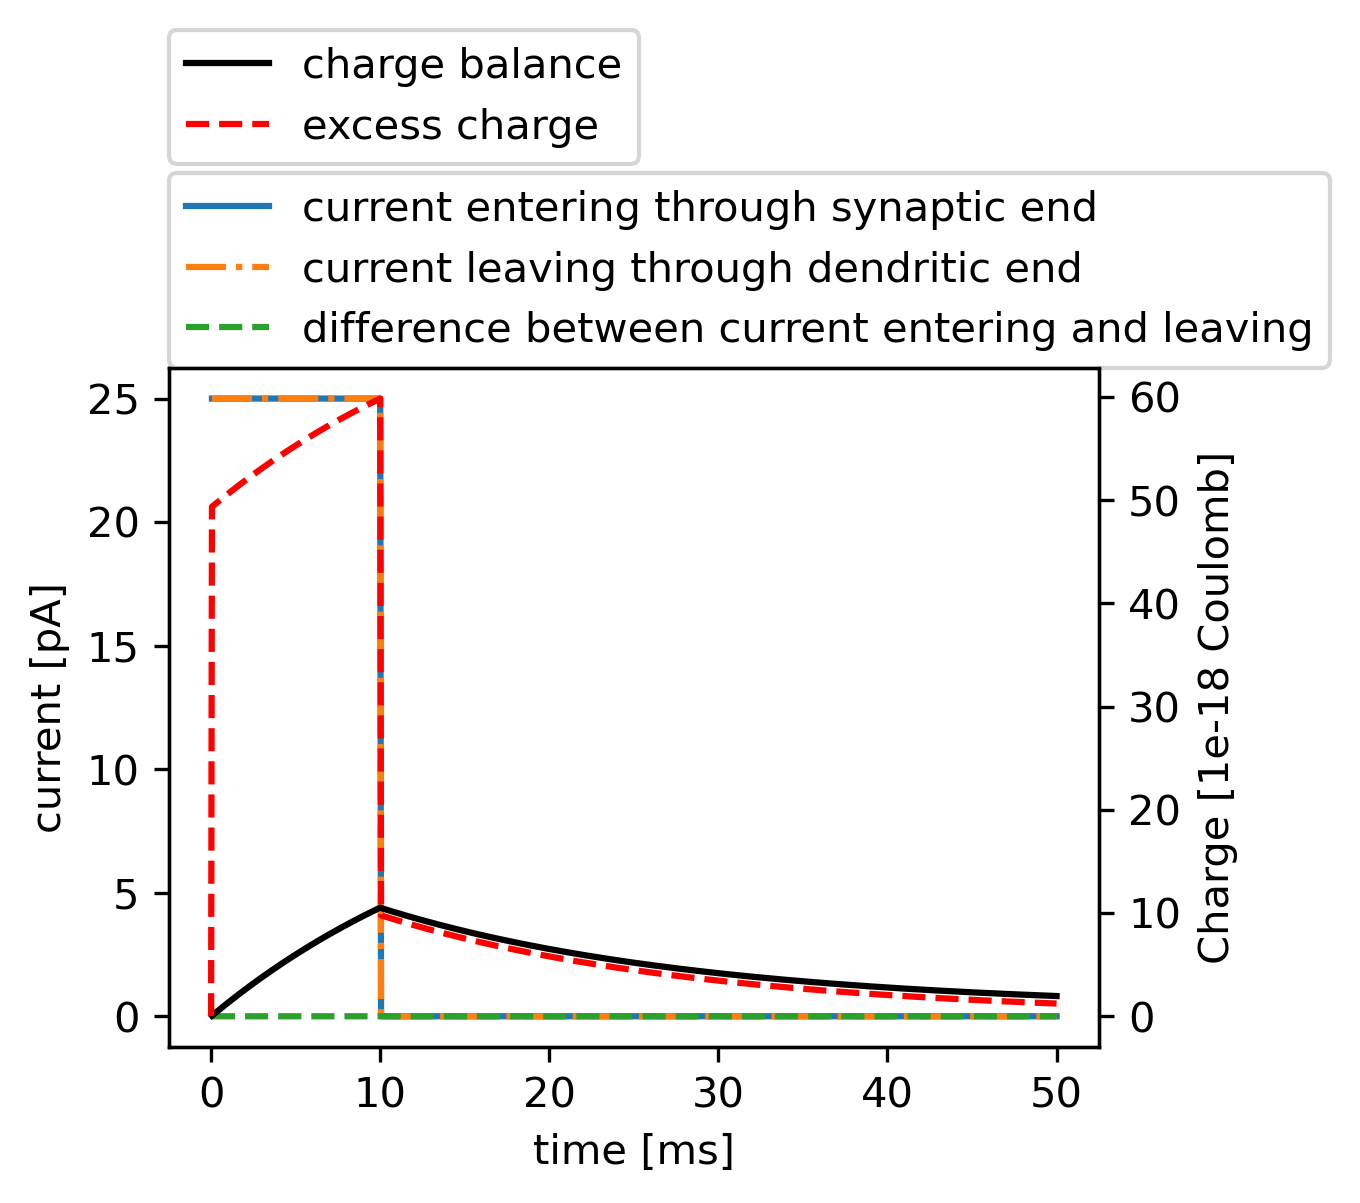

In [171]:
v_seg = np.pi * np.square(a) * dx
charge =  (c_Na + c_K - c_Cl) * N_A * e * v_seg
charge = np.sum(charge[:,1:-1], axis=1)
charge -= charge[0]
 

fig = plt.figure(dpi=300, figsize=(4,3))
ax = fig.add_subplot(111)

i_in = (i_c[1:,-0] + i_e[1:,0]) * 1.e12
i_out = ( i_e[1:,-1] + i_c[1:,-1]) * 1.e12
i_tot = (i_out - i_in) 
tx = t[1:]*1.e3

ax.plot(tx,i_in, label='current entering through synaptic end')
ax.plot(tx,i_out, '-.', label='current leaving through dendritic end')
ax.plot(tx,i_tot, '--', label='difference between current entering and leaving')

ax.set_xlabel('time [ms]')
ax.set_ylabel('current [pA]')

ax2 = plt.twinx(ax)

dt = (t[1] - t[0])
cum_current = -np.cumsum(i_tot*dt*1.e-12)*1.e18
#cum_current /= np.max(cum_current)

#charge = charge / np.max(charge)

ax2.plot(tx,cum_current, 'k-', label='charge balance')
ax2.plot(t*1.e3,charge*1.e18, 'r--', label='excess charge')
ax2.set_ylabel('Charge [1e-18 Coulomb]')


#ax.set_yscale('log')
#ax2.set_yscale('linear')
ax.legend( loc=(0.,1.))
ax2.legend( loc=(0.,1.3))

In [163]:
i_in

array([25., 25., 25., ...,  0.,  0.,  0.])